In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def F_mot(norm, theta, phi) : 
    F = np.zeros(3)
    F[0] = norm*np.sin(theta)*np.cos(phi)
    F[1] = norm * np.sin(theta)*np.sin(phi)
    F[2] = norm * np.cos(theta)

    return F



def translation(Motors, law):
    n_motors = Motors.shape[0]
    Motors_cart = np.zeros((n_motors,3))
    for i, motor in enumerate(Motors[:, :3]) :
         Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    return np.dot(law, Motors_cart)


def rotation(Motors, mass_center, geom_center, law) :
    n_motors = Motors.shape[0]
    Motors_cart = np.zeros((n_motors,3))
    Motors_pos = Motors[:, 3:]
    Motors_dyn = Motors[:, :3]
    
    for i, motor in enumerate(Motors_dyn) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    
    geom = geom_center - mass_center

    # torque = np.cross(geom, Motors_cart, 1, 1)

    torque_G = np.zeros((n_motors,3))
    torque_O = np.zeros((n_motors,3))
    for i, motor in enumerate(Motors):
        torque_G[i, :] = np.cross(Motors_pos[i, :] - geom_center, Motors_cart[i, :])
        torque_O[i, :] =  torque_G[i, :] + np.cross(geom, Motors_cart[i, :])
    return np.dot(law, torque_O)    

def printT(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Tx", "Ty", "Tz"])
    df = df.round(2)
    print(df)
    
 
def printR(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Rx", "Ry", "Rz"])
    df = df.round(2,)
    print(df)   

def printM(Motors, mass_center, geom_center, laws):
    print("For these laws the translations would be :")
    Translations = translation(Motors, laws)
    printT(Translations)
    print("\n")
    print("and the rotations :")
    Rotations = rotation(Motors, mass_center, geom_center, laws)
    printR(Rotations)
pi = np.pi

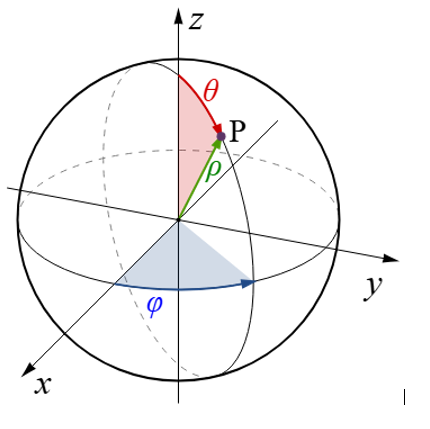

Il faut échanger les angles $\theta$ et $\phi$

$\theta$ : polar angle

$\phi$ : azimuthal angle

In [4]:
# Coordinate [x, y, z]
geom_center = [0, 0, 0] # Origin of the referential
mass_center = [0.7, 0.2, 0.25] # Mass center of the robot
mass_center = np.array(mass_center)
geom_center = np.array(geom_center)
L, l, h  = 1.000, 0.400 ,0.400
# a: position of the motors in the y,z axis
# b: position of the front motors in the x axis
a, b = 0.075, 0.500

# Motor [power, theta, phi, x, y, z]
# theta is the polar angle and phi is the azimuthal one.
Motor_1 = [1,   -pi/2,     3*pi/4,        b,       0-a,      h+a]
Motor_2 = [1,    pi/2,     3*pi/4,        b,       l+a,      h+a]
Motor_3 = [1,    pi/2,     3*pi/4,        b,       0-a,      0-a]
Motor_4 = [1,   -pi/2,     3*pi/4,        b,       l+a,      0-a]
Motor_5 = [1,    3*pi/4,   3*pi/4,        0-a,     0-a,      h+a]
Motor_6 = [1,   -3*pi/4,   3*pi/4,        0-a,     l+a,      h+a]
Motor_7 = [1,    pi/4,     3*pi/4,        0-a,     0-a,      0-a]
Motor_8 = [1,   -pi/4,     3*pi/4,        0-a,     l+a,      0-a]


Motors = np.array([Motor_1,Motor_2, Motor_3, Motor_4, Motor_5, Motor_6, Motor_7, Motor_8])

print(Motors)

[[ 1.         -1.57079633  2.35619449  0.5        -0.075       0.475     ]
 [ 1.          1.57079633  2.35619449  0.5         0.475       0.475     ]
 [ 1.          1.57079633  2.35619449  0.5        -0.075      -0.075     ]
 [ 1.         -1.57079633  2.35619449  0.5         0.475      -0.075     ]
 [ 1.          2.35619449  2.35619449 -0.075      -0.075       0.475     ]
 [ 1.         -2.35619449  2.35619449 -0.075       0.475       0.475     ]
 [ 1.          0.78539816  2.35619449 -0.075      -0.075      -0.075     ]
 [ 1.         -0.78539816  2.35619449 -0.075       0.475      -0.075     ]]


In [5]:
# law = [% of motor 1 activation, % of motor 2 activation, ....] len has to be the same has Motors
f = np.sqrt(1.5)
lois_translation = np.array([
    [ 0,  0,  0,  0, -1, -1,  1,  1],  #Tx
    [-f,  f,  f, -f,  1, -1, -1,  1],  #Ty
    [-f, -f, -f, -f, -1, -1, -1, -1]   #Tz

]) 

printM(Motors, mass_center, geom_center, lois_translation)

For these laws the translations would be :
         Tx    Ty    Tz
Law 0  0.00  0.00  2.83
Law 1 -3.46  3.46  0.00
Law 2  0.00  0.00 -0.00


and the rotations :
        Rx    Ry    Rz
Law 0 -0.0  2.19  0.00
Law 1  0.4 -0.38 -0.69
Law 2 -0.0 -0.00  0.55


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


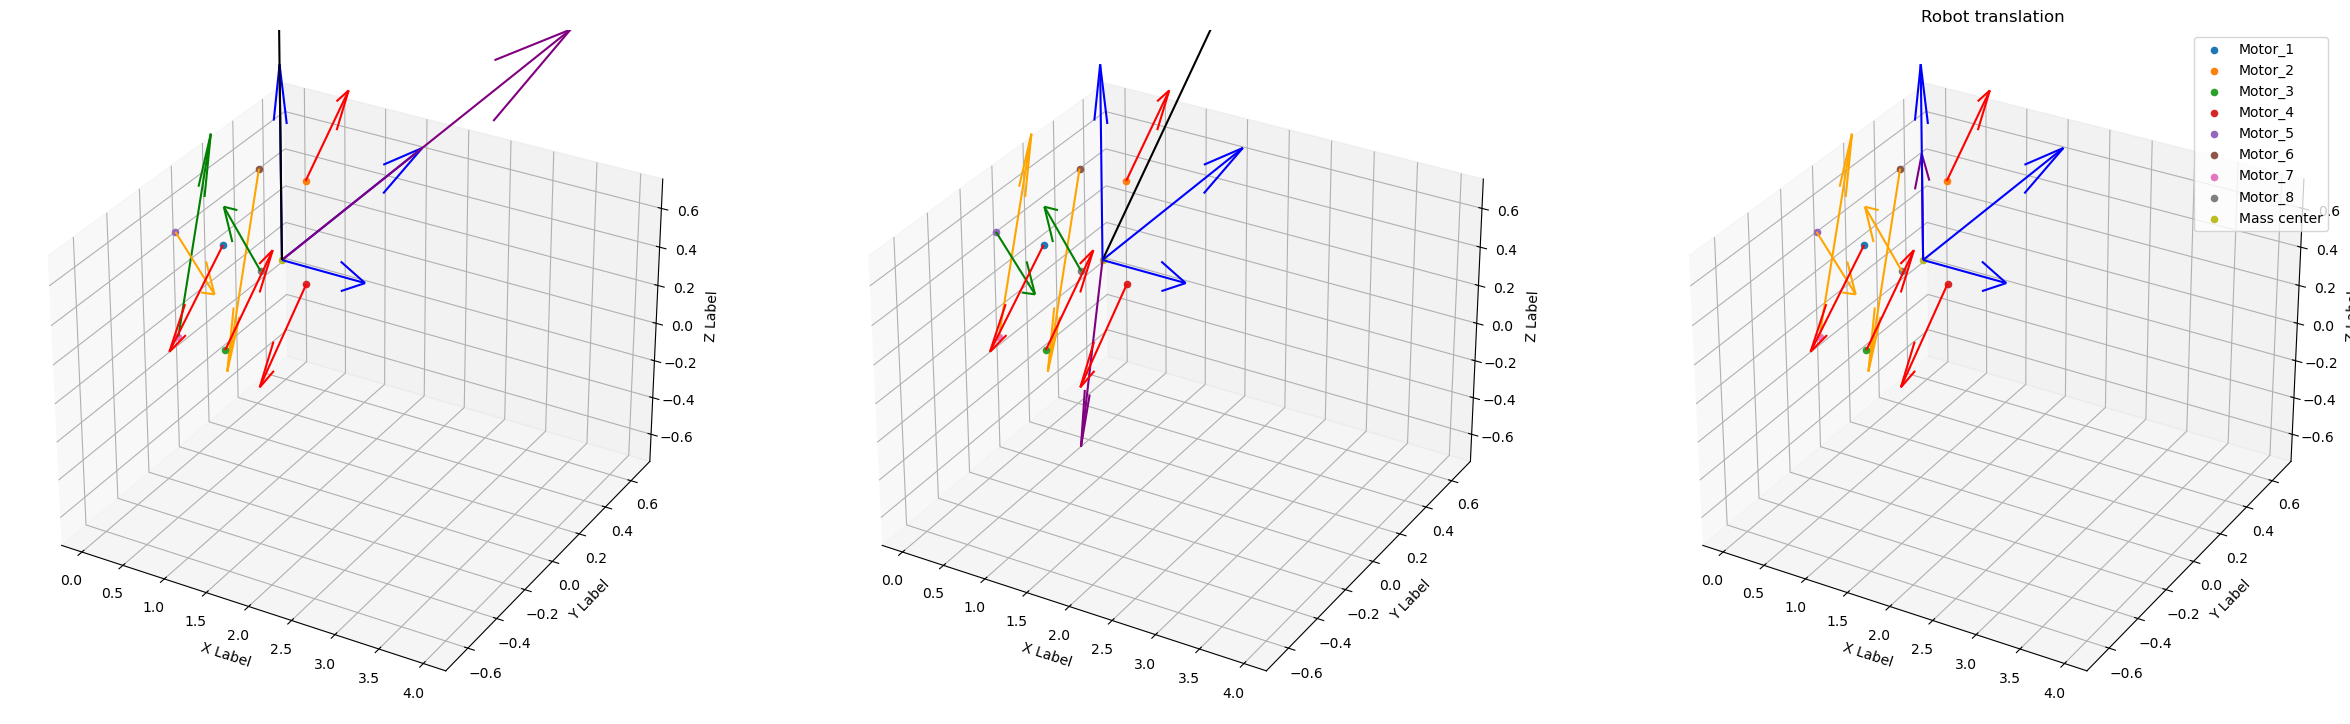

Saved in robot_trans.pdf


In [6]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_translation)
resltR = rotation(Motors, mass_center, geom_center, lois_translation)
for k in range(len(lois_translation)):
    ax = fig.add_subplot(1, len(lois_translation), k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.25, 4.25)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        
        if lois_translation[k][i] == 1:
            color = 'green'
        elif lois_translation[k][i] == -1:
            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[i+4][3]], [Motors[i][4], Motors[i+4][4]], [Motors[i][5], Motors[i+4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[(i+1)%4][3]], [Motors[i][4], Motors[(i+1)%4][4]], [Motors[i][5], Motors[(i+1)%4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i+4][3], Motors[(i+1)%4+4][3]], [Motors[i+4][4], Motors[(i+1)%4+4][4]], [Motors[i+4][5], Motors[(i+1)%4+4][5]], color = 'black')       



    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')



    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Robot translation")
plt.savefig("robot_trans.pdf")
plt.show()
print("Saved in robot_trans.pdf")

In [20]:
f = np.sqrt(1.5)
lois_rotation = np.array([
    [ 1, -1, -1,  1,  1, -1,  1, -1],   # Rx
    [ f,  f,  f,  f,  1,  1,  1,  1],   # Ry
    [-f,  f,  f, -f, -1,  1,  1, -1]    # Rz

    ])


printM(Motors, mass_center, geom_center, lois_rotation)

For these laws the translations would be :
         Tx    Ty   Tz
Law 0  0.83 -0.83  0.0
Law 1  0.00  0.00  0.0
Law 2 -3.46  3.46  0.0


and the rotations :
         Rx    Ry    Rz
Law 0 -0.04 -0.04 -0.98
Law 1  0.00  0.00 -0.55
Law 2 -0.05  0.72 -0.69


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


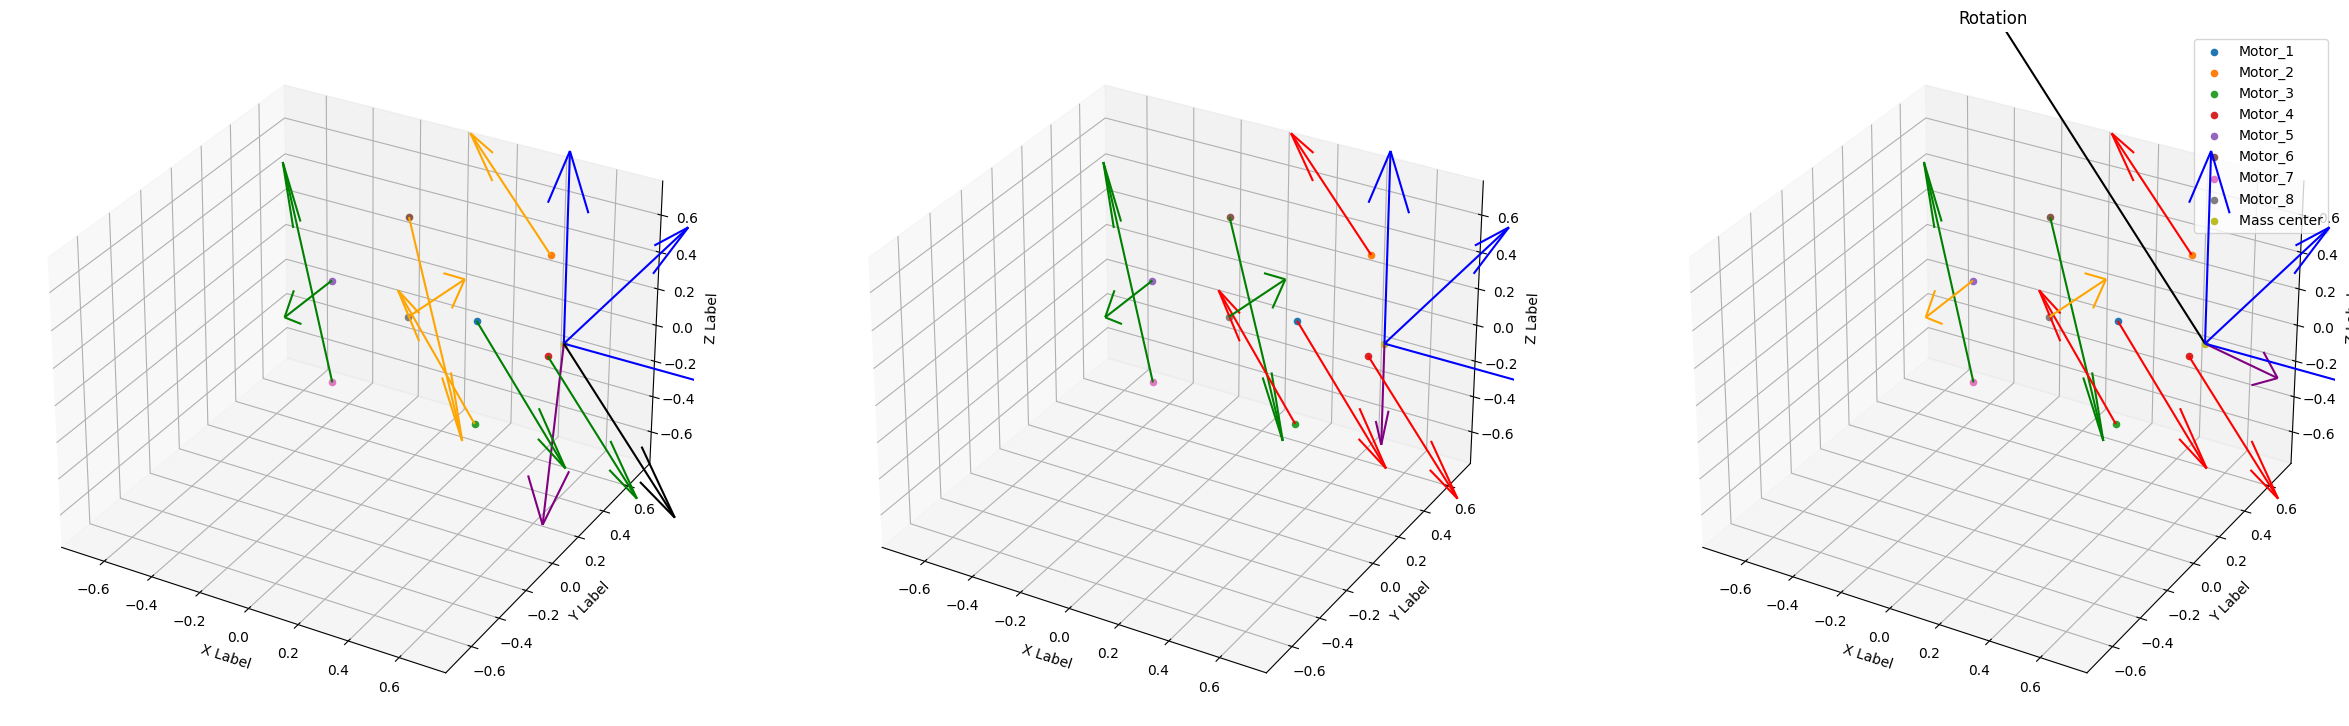

Saved in robot_rot.pdf


In [21]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_rotation)
resltR = rotation(Motors, mass_center, geom_center, lois_rotation)
for k in range(len(lois_rotation)):
    ax = fig.add_subplot(1, len(lois_rotation), k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.75, 0.75)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        if lois_rotation[k][i] == 1:
            color = 'green'
        elif lois_rotation[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")

In [24]:
f = np.sqrt(1.5)
lois_totale = np.array([
    [ 1, -1, -1,  1,  1, -1,  1, -1],   # Rx
    [ f,  f,  f,  f,  1,  1,  1,  1],   # Ry
    [-f,  f,  f, -f, -1,  1,  1, -1],    # Rz
    [ 0,  0,  0,  0, -1, -1,  1,  1],  #Tx
    [-f,  f,  f, -f,  1, -1, -1,  1],  #Ty
    [-f, -f, -f, -f, -1, -1, -1, -1]   #Tz


    ])


printM(Motors, mass_center, geom_center, lois_totale)

For these laws the translations would be :
         Tx    Ty    Tz
Law 0  0.83 -0.83  0.00
Law 1  0.00  0.00  0.00
Law 2 -3.46  3.46  0.00
Law 3  0.00  0.00  2.83
Law 4 -3.46  3.46  0.00
Law 5  0.00 -0.00 -0.00


and the rotations :
         Rx    Ry    Rz
Law 0 -0.04 -0.04 -0.98
Law 1  0.00  0.00 -0.55
Law 2 -0.05  0.72 -0.69
Law 3 -0.00  2.19  0.00
Law 4  0.40 -0.38 -0.69
Law 5 -0.00 -0.00  0.55


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


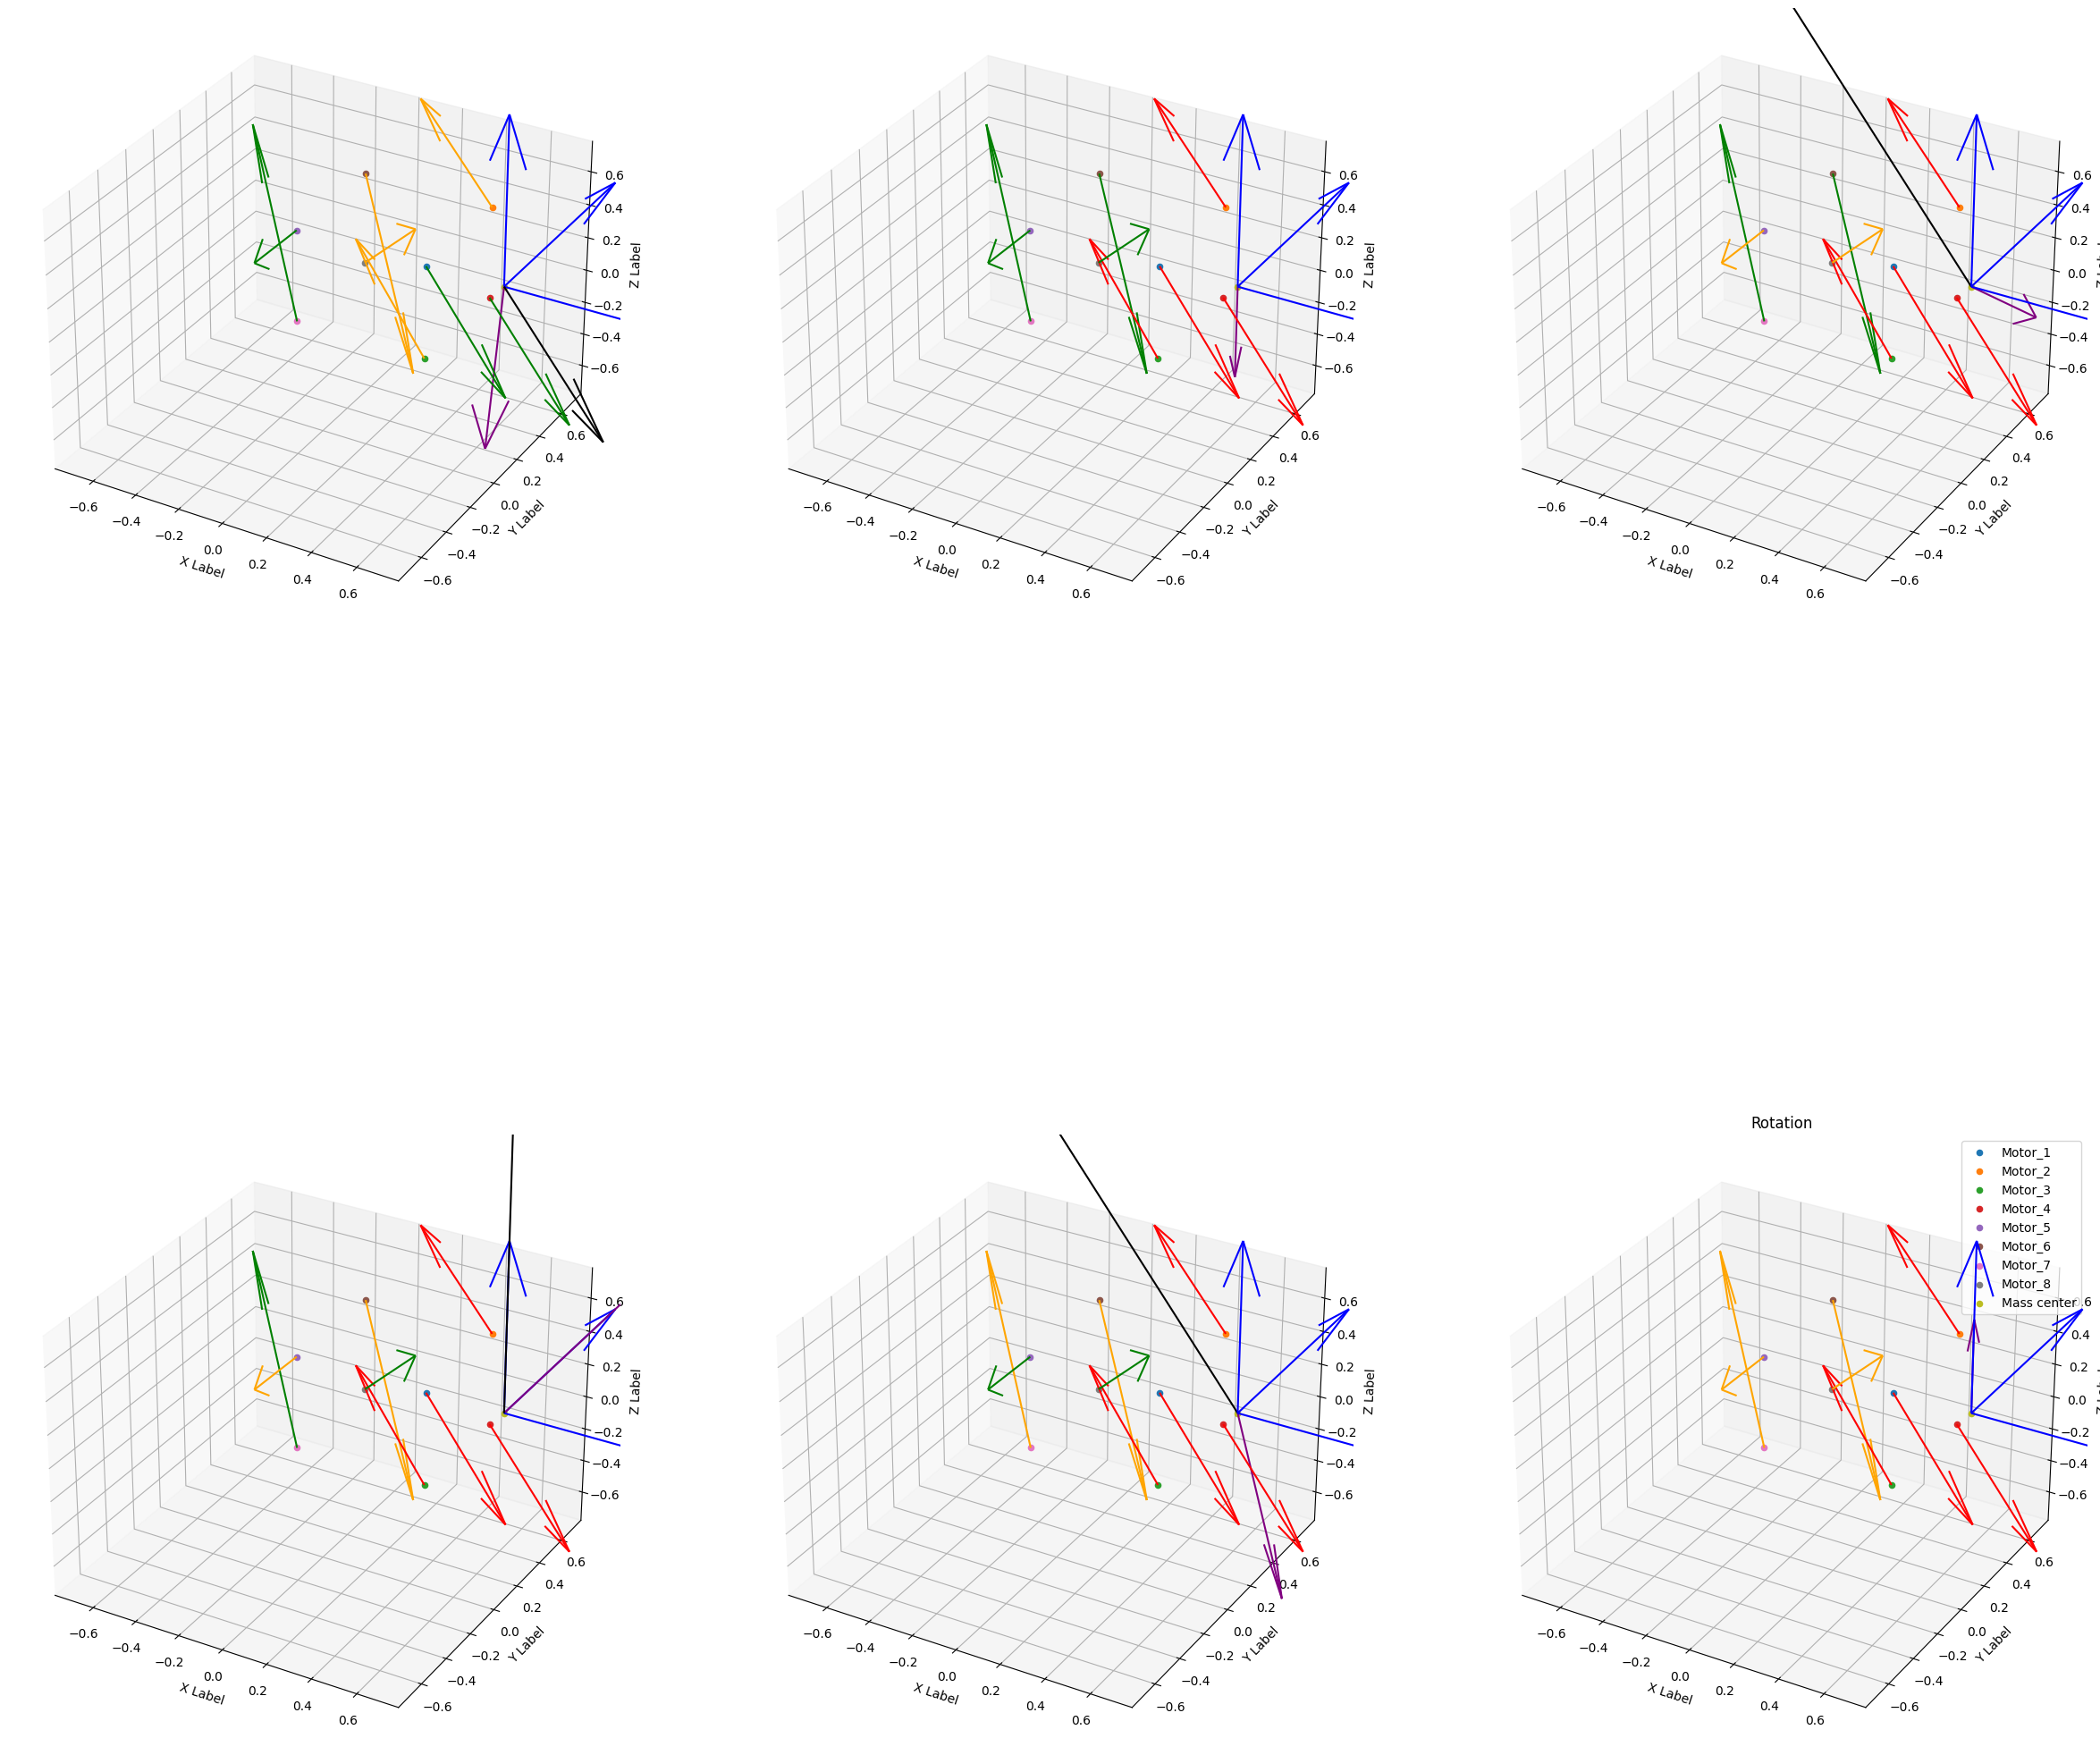

Saved in robot_rot.pdf


In [25]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_totale)
resltR = rotation(Motors, mass_center, geom_center, lois_totale)
for k in range(len(lois_totale)):
    ax = fig.add_subplot(2, len(lois_totale)//2, k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.75, 0.75)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        if lois_totale[k][i] == 1:
            color = 'green'
        elif lois_totale[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")

## Procédure inverse

Retourver la matrice des lois de commande à partir de la différence du mouvement réel en fonction des mouvements voulus

= annulation des moments pendant les translations

In [26]:
import numpy as np
from scipy.optimize import minimize

In [ ]:

def optimize_lois(Motors, mass_center, geom_center, lois_totale, weight=2e-1):
    """
    Motors, mass_center, geom_center : configuration mécanique
    lois_totale : (6, n) matrice initiale des lois
    weight : pondération pour les mouvements parasites
    """

    # Mise à plat
    lois_flat = lois_totale.flatten()

    # Fonction objectif : minimiser les translations et rotations parasites
    def objective(lois_var_flat):
        lois_var = lois_var_flat.reshape(lois_totale.shape) 

        # Séparer translation (3 premières lignes) et rotation (3 suivantes)
        T = translation(Motors, lois_var[3:])
        R = rotation(Motors, mass_center, geom_center, lois_var[:3])
        Tx, Ty, Tz = T[0], T[1], T[2]
        Rx, Ry, Rz = R[0], R[1], R[2]
        print("Tx, Ty, Tz : ", Tx, Ty, Tz)
        print("Rx, Ry, Rz : ", Rx, Ry, Rz)

        # Ce que l'on veut :
        # => Minimiser tout ce qui n'est pas dans la loi d'origine (c'est à dire parasites)
        cost = 0

        # Ajout des translations parasites
        cost += np.sum(np.abs(Tx)) + np.sum(np.abs(Ty)) + np.sum(np.abs(Tz))
        # Ajout des rotations parasites
        cost += np.sum(np.abs(Rx)) + np.sum(np.abs(Ry)) + np.sum(np.abs(Rz))
        # Contrainte de conservation de la loi d'origine
        cost += weight * np.sum(np.abs(lois_var - lois_totale))

        return cost


    # Résolution avec scipy.optimize.minimize
    result = minimize(
        objective,
        lois_flat,
        method='L-BFGS-B',  # Méthode adaptée aux gros problèmes
        options={'maxiter': 1000, 'disp': True}
    )

    optimized_lois = result.x.reshape(lois_totale.shape)

    # Normalisation : on normalise CHAQUE loi indépendamment
    for i in range(optimized_lois.shape[1]):
        max_abs = np.max(np.abs(optimized_lois[:, i]))
        if max_abs > 1e-8:
            optimized_lois[:, i] /= max_abs

    return optimized_lois

In [29]:
optimized_lois_totale = optimize_lois(Motors, mass_center, geom_center, lois_totale)

Tx, Ty, Tz :  [0.         0.         2.82842712] [-3.46410162  3.46410162  0.        ] [ 0.00000000e+00 -1.11022302e-16 -6.66133815e-16]
Rx, Ry, Rz :  [-0.04142136 -0.04142136 -0.98431458] [ 3.46944695e-17  4.44089210e-16 -5.50000000e-01] [-0.05461238  0.72320508 -0.69282032]
Tx, Ty, Tz :  [0.         0.         2.82842712] [-3.46410162  3.46410162  0.        ] [ 0.00000000e+00 -1.11022302e-16 -6.66133815e-16]
Rx, Ry, Rz :  [-0.04142135 -0.04142135 -0.98431457] [ 3.46944695e-17  4.44089210e-16 -5.50000000e-01] [-0.05461238  0.72320508 -0.69282032]
Tx, Ty, Tz :  [0.         0.         2.82842712] [-3.46410162  3.46410162  0.        ] [ 0.00000000e+00 -1.11022302e-16 -6.66133815e-16]
Rx, Ry, Rz :  [-0.04142136 -0.04142136 -0.98431457] [ 3.46944695e-17  4.44089210e-16 -5.50000000e-01] [-0.05461238  0.72320508 -0.69282032]
Tx, Ty, Tz :  [0.         0.         2.82842712] [-3.46410162  3.46410162  0.        ] [ 0.00000000e+00 -1.11022302e-16 -6.66133815e-16]
Rx, Ry, Rz :  [-0.04142135 -0.04

In [30]:
print("Final movement :")
printM(Motors, mass_center, geom_center, optimized_lois_totale)

Final movement :
For these laws the translations would be :
         Tx    Ty    Tz
Law 0  1.46 -1.46  0.05
Law 1  0.52 -0.52 -0.23
Law 2 -1.93  1.93 -0.60
Law 3 -0.03  0.03  0.20
Law 4 -0.27  0.27  0.44
Law 5 -0.02  0.02  0.37


and the rotations :
         Rx    Ry    Rz
Law 0 -0.01 -0.04 -0.11
Law 1 -0.03 -0.26  0.02
Law 2 -0.01  0.06  0.15
Law 3  0.01  0.19  0.20
Law 4  0.20 -0.06  0.31
Law 5  0.02  0.36  0.38


In [31]:
print("Optimized laws :")
print(optimized_lois_totale)

Optimized laws :
[[ 1.         -0.8749647  -0.79564203  0.86216045  0.23717952 -0.95730448
   0.11744411 -0.76841905]
 [ 0.93784246  0.98081771  0.91327158  0.95238821  0.60714655  1.
   0.31284114  0.96208256]
 [-0.69036949  0.96105318  0.91788011 -1.         -1.          0.96914145
  -0.05138076 -0.82909569]
 [-0.33588263 -0.4010878  -0.40108779 -0.39980528 -0.48984555 -0.49476599
  -0.27827209 -0.42554048]
 [-0.25671251  0.23973012  0.23973012 -0.3055681   0.22734845 -0.84568993
  -1.          1.        ]
 [-0.83913891 -1.         -1.         -0.99883751 -0.91644461 -0.92165887
  -0.52097239 -0.79383091]]
